In [4]:

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")


# Classification with TensorFlow 2.0
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv(r'C:/Users/ryans/OneDrive/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/TensorFlow/car_evaluation.csv', names=cols, header=None)

cars.head()


,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


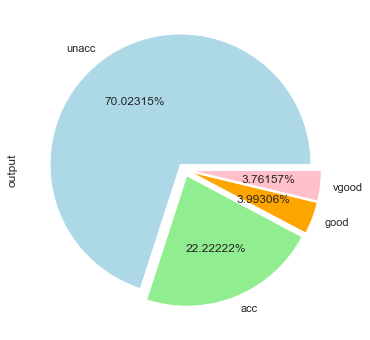

In [5]:

plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size


cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05,0.05))


price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')

labels = pd.get_dummies(cars.output, prefix='condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety] , axis=1)


labels.head()
y = labels.values


In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Model Training
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model


input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


print(model.summary())


history = model.fit(X_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)


score = model.evaluate(X_test, y_test, verbose=1)



Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None
Train on 1105 samples, validate on 277 samples
Epoch 1/50
1105/1105 [==============================] - 0s 303us/sample - loss: 1.0821 - acc: 0.5466 - val_loss: 0.8500 - val_acc: 0.6498
Epoch 2/50
1105/1105 [==============================] - 0s 120us/samp

In [8]:


print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Test Score: 0.05592669918056513
Test Accuracy: 0.982659


In [9]:
# Regression with TensorFlow 2.0
petrol_cons = pd.read_csv(r'C:/Users/ryans/OneDrive/Desktop/Briefcase/PDFs/1-ALL PYTHON & R CODE SAMPLES/TensorFlow/petrol_consumption.csv')

petrol_cons.head()

X = petrol_cons.iloc[:, 0:4].values
y = petrol_cons.iloc[:, 4].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(100, activation='relu')(input_layer)
dense_layer_2 = Dense(50, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(25, activation='relu')(dense_layer_2)
output = Dense(1)(dense_layer_3)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])


history = model.fit(X_train, y_train, batch_size=2, epochs=100, verbose=1, validation_split=0.2)



Train on 30 samples, validate on 8 samples
Epoch 1/100
30/30 [==============================] - 0s 7ms/sample - loss: 341801.4469 - mean_squared_error: 341801.4062 - val_loss: 402338.6523 - val_mean_squared_error: 402338.6562
Epoch 2/100
30/30 [==============================] - 0s 636us/sample - loss: 341320.6240 - mean_squared_error: 341320.6250 - val_loss: 401670.4922 - val_mean_squared_error: 401670.5000
Epoch 3/100
30/30 [==============================] - 0s 798us/sample - loss: 340303.5969 - mean_squared_error: 340303.5625 - val_loss: 400266.3633 - val_mean_squared_error: 400266.3750
Epoch 4/100
30/30 [==============================] - 0s 752us/sample - loss: 338287.0302 - mean_squared_error: 338287.0000 - val_loss: 397380.9766 - val_mean_squared_error: 397380.9688
Epoch 5/100
30/30 [==============================] - 0s 771us/sample - loss: 334107.6521 - mean_squared_error: 334107.6250 - val_loss: 391843.0508 - val_mean_squared_error: 391843.0312
Epoch 6/100
30/30 [===============

30/30 [==============================] - 0s 635us/sample - loss: 3561.4132 - mean_squared_error: 3561.4136 - val_loss: 9779.0210 - val_mean_squared_error: 9779.0215
Epoch 46/100
30/30 [==============================] - 0s 661us/sample - loss: 3436.1881 - mean_squared_error: 3436.1880 - val_loss: 9916.6451 - val_mean_squared_error: 9916.6445
Epoch 47/100
30/30 [==============================] - 0s 701us/sample - loss: 3379.3025 - mean_squared_error: 3379.3022 - val_loss: 10119.9311 - val_mean_squared_error: 10119.9307
Epoch 48/100
30/30 [==============================] - 0s 699us/sample - loss: 3278.0158 - mean_squared_error: 3278.0161 - val_loss: 9888.1800 - val_mean_squared_error: 9888.1797
Epoch 49/100
30/30 [==============================] - 0s 664us/sample - loss: 3155.2236 - mean_squared_error: 3155.2236 - val_loss: 9803.0029 - val_mean_squared_error: 9803.0029
Epoch 50/100
30/30 [==============================] - 0s 632us/sample - loss: 3130.3052 - mean_squared_error: 3130.3052 -

Epoch 91/100
30/30 [==============================] - 0s 664us/sample - loss: 1685.4655 - mean_squared_error: 1685.4655 - val_loss: 10021.7569 - val_mean_squared_error: 10021.7568
Epoch 92/100
30/30 [==============================] - 0s 698us/sample - loss: 1676.6637 - mean_squared_error: 1676.6636 - val_loss: 10116.3794 - val_mean_squared_error: 10116.3789
Epoch 93/100
30/30 [==============================] - 0s 631us/sample - loss: 1669.6433 - mean_squared_error: 1669.6432 - val_loss: 10283.0792 - val_mean_squared_error: 10283.0791
Epoch 94/100
30/30 [==============================] - 0s 631us/sample - loss: 1662.4392 - mean_squared_error: 1662.4393 - val_loss: 10176.4206 - val_mean_squared_error: 10176.4209
Epoch 95/100
30/30 [==============================] - 0s 658us/sample - loss: 1794.3231 - mean_squared_error: 1794.3231 - val_loss: 10156.0618 - val_mean_squared_error: 10156.0625
Epoch 96/100
30/30 [==============================] - 0s 698us/sample - loss: 1742.5377 - mean_squar

In [10]:

from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))



57.82820500006744
89.66593945426837
